<a href="https://colab.research.google.com/github/karna-charan/-Neural-Networks-and-Deep-Learning-/blob/main/RGB_IMAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install tensorflow opencv-python matplotlib


Error: Image 'my_image.jpg' not found. Please upload your image file.


Saving 20250413_205728.jpg to 20250413_205728.jpg
User uploaded file "20250413_205728.jpg"


(np.float64(-0.5), np.float64(1847.5), np.float64(3999.5), np.float64(-0.5))

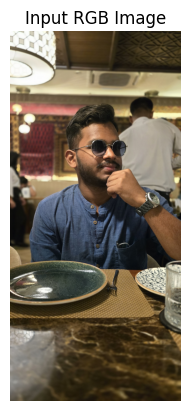

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io

# Load RGB image (replace with your image path)
# First, try to load the image from the specified path
img = cv2.imread("my_image.jpg")

# Check if the image was loaded successfully
if img is None:
    print("Error: Image 'my_image.jpg' not found. Please upload your image file.")
    # Optionally, you can add code here to allow the user to upload a file
    uploaded = files.upload()
    if uploaded:
        for fn in uploaded.keys():
            print(f'User uploaded file "{fn}"')
            # Read image from uploaded bytes
            img_bytes = uploaded[fn]
            img = cv2.imdecode(np.frombuffer(img_bytes, np.uint8), cv2.IMREAD_COLOR)
            break # Assuming only one image upload or take the first one
    if img is None: # If still no image after upload attempt, exit
        print("No image loaded. Exiting.")
        exit() # Or raise an error, or handle gracefully

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Normalize and reshape
img = img / 255.0
img_input = np.expand_dims(img, axis=0)  # (1, H, W, 3)

plt.imshow(img)
plt.title("Input RGB Image")
plt.axis("off")

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(
        filters=1,
        kernel_size=(1, 1),
        activation='linear',
        input_shape=(None, None, 3)
    )
])

model.compile(optimizer='adam', loss='mse')
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, None, None, 1)  │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


(np.float64(-0.5), np.float64(1847.5), np.float64(3999.5), np.float64(-0.5))

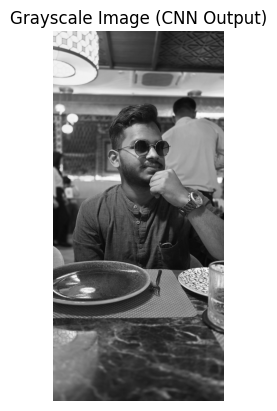

In [9]:
gray_output = model.predict(img_input)

# Remove batch & channel dimensions
gray_image = gray_output[0, :, :, 0]

plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image (CNN Output)")
plt.axis("off")


In [10]:
# Create target grayscale image
gray_target = cv2.cvtColor((img*255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
gray_target = gray_target / 255.0
gray_target = np.expand_dims(gray_target, axis=(0, -1))

# Train model
model.fit(img_input, gray_target, epochs=100, verbose=0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


(np.float64(-0.5), np.float64(1847.5), np.float64(3999.5), np.float64(-0.5))

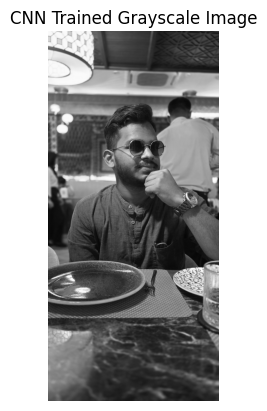

In [11]:
gray_output = model.predict(img_input)
gray_image = gray_output[0, :, :, 0]

plt.imshow(gray_image, cmap='gray')
plt.title("CNN Trained Grayscale Image")
plt.axis("off")
